
# Project: Investigate a Dataset (No Show Appointments - kagglev2 , may/2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● The encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Questions try to answer:
#### 1- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
#### 2-what is the overall appointment show-up vs. no show-up rate
#### 3-Is their a relation between age and other factor like (Hypertension, Diabetes, Alcoholism)

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from datetime import datetime


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('E:\data analysis udacity\investigate new dataset\KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
pd.isnull(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

no null value 

In [10]:
sum(df.duplicated())

0

there is no duplicates in the rows

In [11]:
#replace age value which is less 0 by the mean of the age and keep age zero as
#it indicates that the patient is a new born
mean_age=df['Age'].mean() 
print(sum(df['Age']<0))
df.loc[(df.Age == -1),'Age']=int(mean_age)

1


In [12]:
print(sum(df['Age']<0))
df.head()

0


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df['PatientId'].duplicated().sum()

48228

their is 48228 duplicated patient which means the there are patient that have shown multiple time 

In [14]:
df['AppointmentID'].duplicated().sum()

0

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089218,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Data Cleaning 

## Rename columns

In [16]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'},inplace=True)

## change columns data types

In [23]:
def parse_date(Date):
    if Date=='None':
        return None
    else:
        df[Date] = pd.to_datetime(df[Date]).dt.date
        df[Date] = pd.to_datetime(df[Date]).dt.normalize()
        
    return df[Date].head(10)

In [24]:
#df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
parse_date('AppointmentDay')

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
5   2016-04-29
6   2016-04-29
7   2016-04-29
8   2016-04-29
9   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

In [25]:
parse_date('ScheduledDay')

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
5   2016-04-27
6   2016-04-27
7   2016-04-27
8   2016-04-29
9   2016-04-27
Name: ScheduledDay, dtype: datetime64[ns]

In [30]:
#add shown and no shown column to the table
df['shown']=df['No_show']=='No'
df['not_shown']=df['No_show']=='Yes'
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,shown,not_shown
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,False
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,False
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,False
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False


In [31]:
#discritize the age value to interval
df.describe().Age

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [32]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0 ,18 , 37,55 ,115 ] # Fill in this list with five values you just found

In [33]:
# Labels for the four acidity level groups
bin_names = ['baby', 'young adults', 'middle aged adults', 'old adults' ] # Name each age category

In [34]:
# Creates age_bins column
#baby: 1-18 years
#young adults: 18-37 years
#middle aged adults: 37-55 years
#old adults: 55-115 years
df['age_bins'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,shown,not_shown,age_bins
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,False,old adults
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,False,old adults
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,False,old adults
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False,baby
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False,old adults


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (what is the overall appointment show-up vs. no show-up rate?)

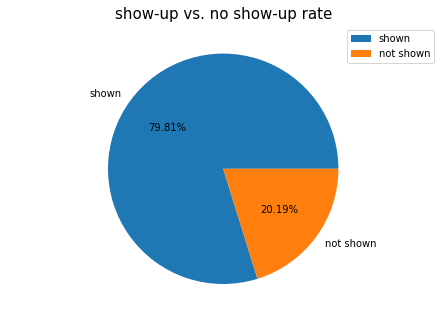

In [35]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['shown','not shown']
ax.pie(df['shown'].value_counts(), labels = langs,autopct='%1.2f%%')
ax.set_title("show-up vs. no show-up rate", fontsize = 15);
plt.legend();

#### As shown in shown pie chart thier is 79.81% who showed up and 20.19% who did not showed up

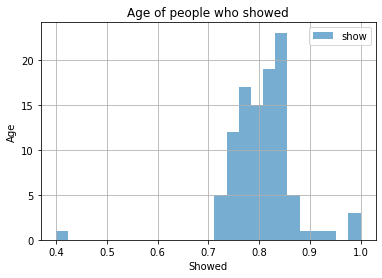

In [36]:
#display distribution of age of people who showed
df.groupby('Age')['shown'].mean().hist(alpha=0.6,bins=25,label='show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend();

In [37]:
#PatientId	AppointmentID	Gender	ScheduledDay	AppointmentDay	Age	Neighbourhood	Scholarship	Hypertension	Diabetes	Alcoholism	Handicap	SMS_received	No_show	shown	not_shown	age_bins

### Investiagte various factors that affect the shown of an appoinment

In [38]:
#A function that draw a bar chart between two columns
def draw_bar(col1,col2,ylabel,title):
    df.groupby(col1)[col2].mean().plot(kind='bar',figsize=(10,6));
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend();
    return None

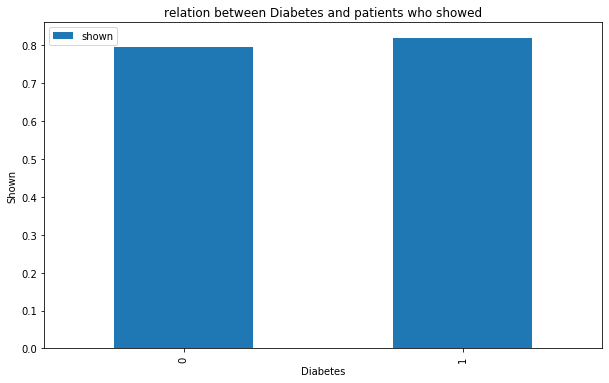

In [39]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
draw_bar('Diabetes','shown',"Shown","relation between Diabetes and patients who showed")

#### patients who showed up and have diabetes are slightly  more than who don`t have diabetes 

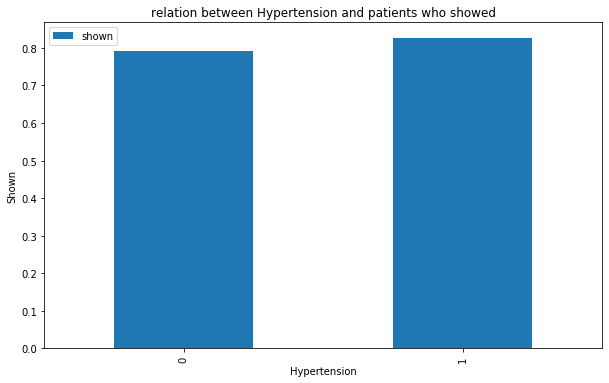

In [40]:
#Scholarship	Hypertension	Diabetes	Alcoholism	Handicap	SMS_received
draw_bar('Hypertension','shown',"Shown","relation between Hypertension and patients who showed")

#### patients who showed up and have hypertension are slightly  more than who don`t have hypertension

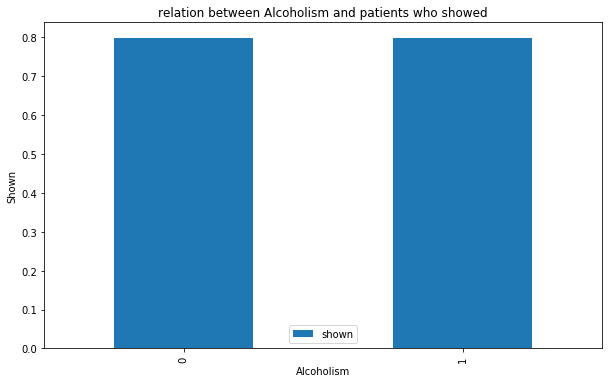

In [41]:
draw_bar('Alcoholism','shown',"Shown","relation between Alcoholism and patients who showed")

#### their is no relation between being alcoholic or not and the shown up rate 

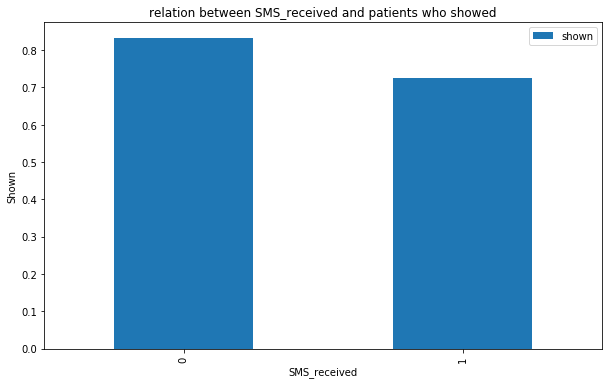

In [42]:
draw_bar('SMS_received','shown',"Shown","relation between SMS_received and patients who showed")

#### sending SMS dosen`t increase the shown up rate

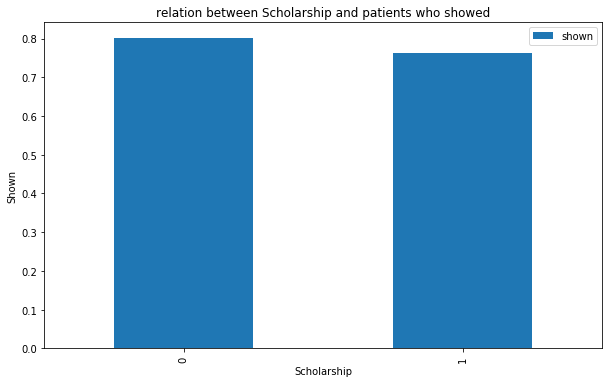

In [43]:
draw_bar('Scholarship','shown',"Shown","relation between Scholarship and patients who showed")

#### scholarship dosen`t increase the shown up reasults 

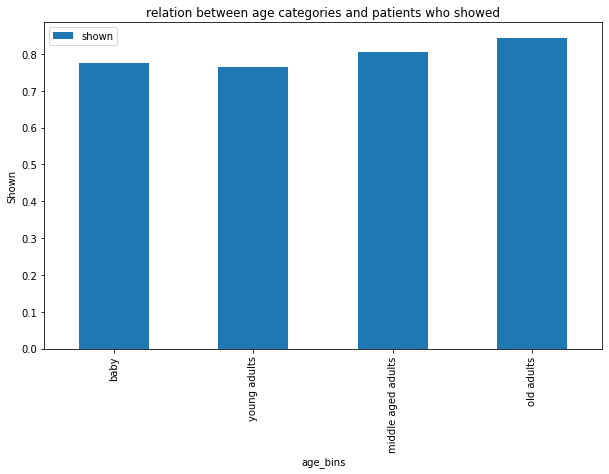

In [44]:
draw_bar('age_bins','shown',"Shown","relation between age categories and patients who showed")

#### old adults category(55-155) are the most shown up patientd

### find a relation between age and other factor (Hypertension, Diabetes, Alcoholism)

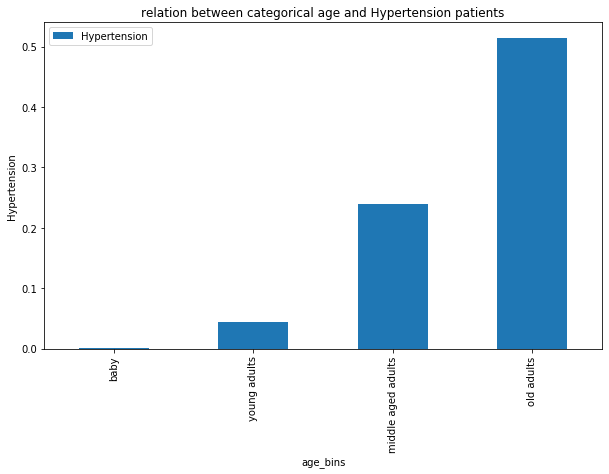

In [45]:
draw_bar('age_bins','Hypertension',"Hypertension","relation between categorical age and Hypertension patients")

#### patients from old adults category (55-115 years) are the most patients who have hypertension

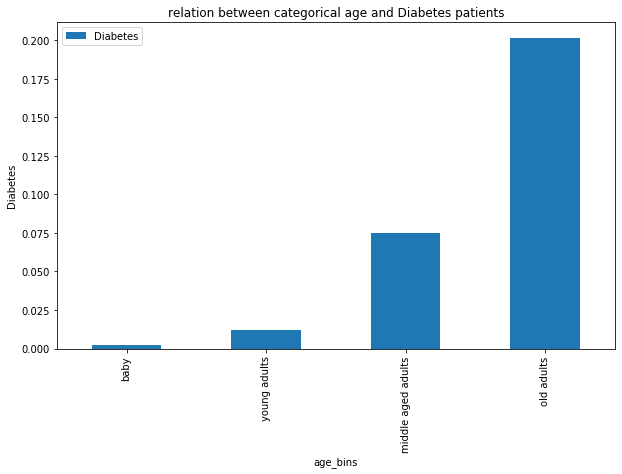

In [46]:
draw_bar('age_bins','Diabetes',"Diabetes","relation between categorical age and Diabetes patients")

#### patients from old adults category (55-115 years) are the most patients who have diabetes

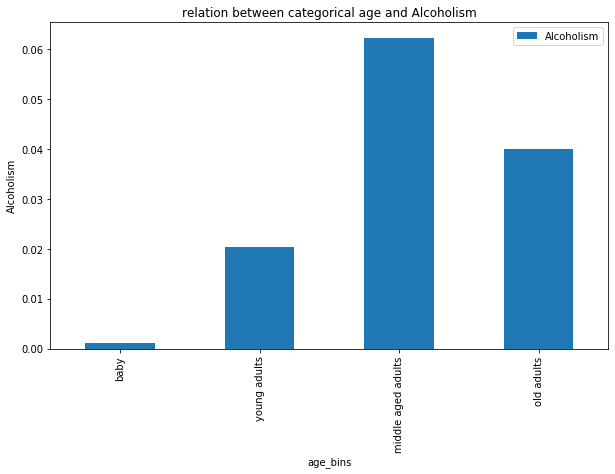

In [47]:
draw_bar('age_bins','Alcoholism',"Alcoholism","relation between categorical age and Alcoholism")

#### patients from middle aged category (37-55 years) are the most patients who are alcoholic

### Discribe the status of shown patients and discribe their health status

In [144]:
#make a show up patient dataframe

df_shown=df[df['shown']==True]

In [145]:
df_shown.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,shown,not_shown,age_bins
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,False,old adults
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,False,old adults
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,False,old adults
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False,baby
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False,old adults


Text(0.5, 1.0, 'histogram between gender and showed paient')

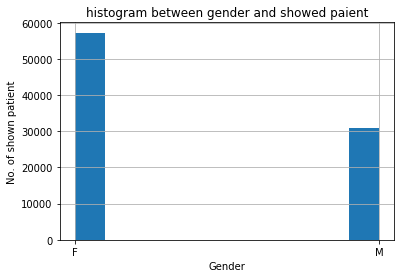

In [146]:
df_shown ['Gender'].hist();
plt.xlabel("Gender")
plt.ylabel("No. of shown patient")
plt.title("histogram between gender and showed paient")


#### as its shown in the histogram Female patients are more than male patients

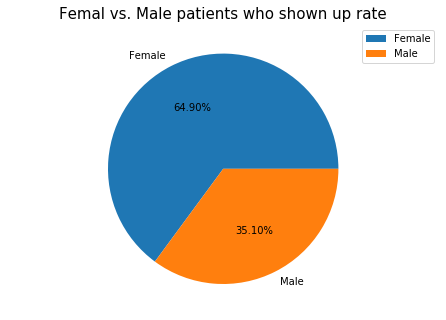

In [147]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Female','Male']
ax.pie(df_shown['Gender'].value_counts(), labels = langs,autopct='%1.2f%%')
ax.set_title("Femal vs. Male patients who shown up rate", fontsize = 15);
plt.legend();

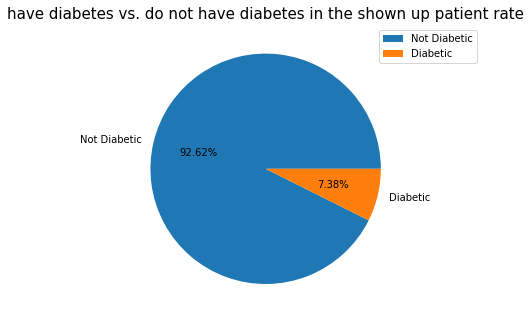

In [155]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Not Diabetic','Diabetic']
ax.pie(df_shown['Diabetes'].value_counts(), labels = langs,autopct='%1.2f%%')
ax.set_title("have diabetes vs. do not have diabetes in the shown up patient rate", fontsize = 15); 
plt.legend();

C:\Users\Laptop Market\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Relation between Neighbourhood and shown patient')

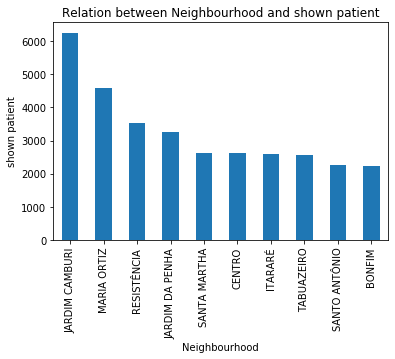

In [152]:
df_shown ['Neighbourhood'].value_counts().head(10).plot('bar');
plt.ylabel('shown patient')
plt.xlabel('Neighbourhood')
plt.title('Relation between Neighbourhood and shown patient')

<a id='conclusions'></a>
## Conclusions
### Results

**1- As shown in shown pie chart thier is 79.81% who showed up and 20.19% who did not showed up**

**2- As its shown in the histogram Female patients are more than male patients**

**3- Patients who showed up and have diabetes are slightly more than who aren`t diabetic**

**4- Patients who showed up and have hypertension are slightly more than who don`t have hypertension**

**5- Their is no relation between being alcoholic or not and the shown up rate**

**6- Sending SMS dosen`t increase the shown up rate**

**7- Scholarship dosen`t increase the shown up reasults**

**8- Old adults category(55-155) are the most shown up patientd**

**9- Patients from old adults category (55-115 years) are the most patients who have hypertension**

**10- Patients from old adults category (55-115 years) are the most patients who have diabetes**

### Limitations
#### There are a couple of limitations with our data:
##### 1. Most of our variables are categorical, which does not allow for a high level of statistical method that can be used to provide correlations etc
##### 2. The statistics used here are descriptive statistics, not inferential  , meaning that we did not create any hypotheses or controlled experiments or inferences with our data.
##### 3. We do not have a lot of details for certain factors to draw conclusions.  For the SMS_received example, the data shows that no - showers are more likely to receive an SMS.  This may seem counter intuitive, but we do not have information on the conditions of when the SMS is sent.  For example they may target No - showers with SMS, or they may send the SMS once the Patient has not checked in 30 minutes prior to their appointment etc.
##### 4. Cannot show strong correlations between factors since most of our data is categorical.
